In [44]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from matplotlib.gridspec import GridSpec
import typing as t
data = pandas.read_csv("../report_willow_garage.csv")
data['goal_success_rate'] = data['n_goals_completed'] / data['n_goals']

In [45]:
data

,n_robots,algorithm,n_goals,n_goals_completed,n_goals_failed,distance_traveled,n_transfers,planning_time,n_planning_timeouts,postponements,replans,transfer_distance_traveled,n_conflicts,n_rr_conflicts,n_steps,goal_success_rate
0,1,namo,50.0,50.0,0.0,58164.135111,12.0,71.220083,0.0,0.0,50.0,614.558453,0.0,0.0,4507.0,1.00
1,1,namo,50.0,49.0,1.0,61217.649545,10.0,79.298367,0.0,0.0,50.0,677.132044,0.0,0.0,4737.0,0.98
2,1,namo,50.0,50.0,0.0,51174.275102,13.0,68.144801,0.0,0.0,50.0,755.771658,0.0,0.0,4012.0,1.00
3,1,namo,50.0,50.0,0.0,51772.988886,14.0,67.012753,0.0,0.0,50.0,626.984862,0.0,0.0,4154.0,1.00
4,1,namo,50.0,49.0,1.0,32522.744820,18.0,83.360430,0.0,0.0,50.0,1011.837680,0.0,0.0,2690.0,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939,10,snamo_ncr,50.0,4.0,46.0,1290.265168,1.0,28.356640,0.0,0.0,50.0,156.213204,46.0,46.0,168.0,0.08
5940,10,snamo_ncr,50.0,3.0,47.0,3182.205857,2.0,41.500417,0.0,0.0,50.0,177.426409,47.0,46.0,316.0,0.06
5941,10,snamo_ncr,50.0,14.0,36.0,12208.803911,3.0,129.615815,0.0,0.0,50.0,618.639613,36.0,32.0,1018.0,0.28
5942,10,snamo_ncr,50.0,9.0,41.0,9239.449901,1.0,54.391792,0.0,0.0,50.0,111.213204,41.0,40.0,777.0,0.18


In [46]:
avg = data.groupby(['n_robots','algorithm']).mean()

In [47]:
avg

n_goals  n_goals_completed  n_goals_failed  \
n_robots algorithm                                               
1        namo          50.0          49.100000        0.900000   
         namo_ncr      50.0          49.100000        0.900000   
         namo_ndr      50.0          49.100000        0.900000   
         snamo         50.0          49.950000        0.050000   
         snamo_ncr     50.0          49.950000        0.050000   
         snamo_ndr     50.0          49.950000        0.050000   
2        namo          50.0          47.250000        2.750000   
         namo_ncr      50.0          26.875000       23.125000   
         namo_ndr      50.0          42.700000        7.300000   
         snamo         50.0          48.675000        1.325000   
         snamo_ncr     50.0          27.600000       22.400000   
         snamo_ndr     50.0          45.575000        4.425000   
3        namo          50.0          45.250000        4.750000   
         namo_ncr      50.0          19.033333       30.966667   
         namo_ndr      50.0          35.450000       14.550000   
         snamo         50.0          47.066667        2.933333   
         snamo_ncr     50.0          17.683333       32.316667   
         snamo_ndr     50.0          38.700000       11.300000   
4        namo          50.0          41.025000        8.975000   
         namo_ncr      50.0          15.262500       34.737500   
         namo_ndr      50.0          30.650000       19.350000   
         snamo         50.0          43.050000        6.950000   
         snamo_ncr     50.0          14.162500       35.837500   
         snamo_ndr     50.0          31.212500       18.787500   
5        namo          50.0          39.890000       10.110000   
         namo_ncr      50.0          10.670000       39.330000   
         namo_ndr      50.0          22.510000       27.490000   
         snamo         50.0          39.940000       10.060000   
         snamo_ncr     50.0          10.510000       39.490000   
         snamo_ndr     50.0          25.510000       24.490000   
6        namo          50.0          34.375000       15.625000   
         namo_ncr      50.0          10.141667       39.858333   
         namo_ndr      50.0          19.066667       30.933333   
         snamo         50.0          35.800000       14.200000   
         snamo_ncr     50.0           9.741667       40.258333   
         snamo_ndr     50.0          20.750000       29.250000   
7        namo          50.0          31.008929       18.991071   
         namo_ncr      50.0           8.021429       41.978571   
         namo_ndr      50.0          15.364286       34.635714   
         snamo         50.0          31.841270       18.158730   
         snamo_ncr     50.0           7.842857       42.157143   
         snamo_ndr     50.0          16.492857       33.507143   
8        namo          50.0          24.337500       25.662500   
         namo_ncr      50.0           7.056250       42.943750   
         namo_ndr      50.0          12.462500       37.537500   
         snamo         50.0          27.406250       22.593750   
         snamo_ncr     50.0           6.850000       43.150000   
         snamo_ndr     50.0          12.512500       37.487500   
9        namo          50.0          19.566667       30.433333   
         namo_ncr      50.0           5.616667       44.383333   
         namo_ndr      50.0          11.283333       38.716667   
         snamo         50.0          23.588889       26.411111   
         snamo_ncr     50.0           5.666667       44.333333   
         snamo_ndr     50.0          11.700000       38.300000   
10       namo          50.0          18.371429       31.628571   
         namo_ncr      50.0           4.925000       45.075000   
         namo_ndr      50.0           9.694444       40.305556   
         snamo         50.0          22.175000       27.825000   
         snamo_ncr     50.0           5.200000       44.8000

In [48]:
std = data.groupby(['n_robots','algorithm']).std()
std

n_goals  n_goals_completed  n_goals_failed  \
n_robots algorithm                                               
1        namo           0.0           1.020836        1.020836   
         namo_ncr       0.0           1.020836        1.020836   
         namo_ndr       0.0           1.020836        1.020836   
         snamo          0.0           0.223607        0.223607   
         snamo_ncr      0.0           0.223607        0.223607   
         snamo_ndr      0.0           0.223607        0.223607   
2        namo           0.0           5.319292        5.319292   
         namo_ncr       0.0           6.729908        6.729908   
         namo_ndr       0.0           6.034941        6.034941   
         snamo          0.0           1.992132        1.992132   
         snamo_ncr      0.0           6.376238        6.376238   
         snamo_ndr      0.0           4.187206        4.187206   
3        namo           0.0           3.904040        3.904040   
         namo_ncr       0.0           6.774745        6.774745   
         namo_ndr       0.0           5.487814        5.487814   
         snamo          0.0           3.024570        3.024570   
         snamo_ncr      0.0           5.852688        5.852688   
         snamo_ndr      0.0           6.068256        6.068256   
4        namo           0.0           9.264025        9.264025   
         namo_ncr       0.0           7.528417        7.528417   
         namo_ndr       0.0           6.523764        6.523764   
         snamo          0.0           8.136338        8.136338   
         snamo_ncr      0.0           6.628370        6.628370   
         snamo_ndr      0.0           7.855811        7.855811   
5        namo           0.0           4.306197        4.306197   
         namo_ncr       0.0           7.840654        7.840654   
         namo_ndr       0.0           7.820583        7.820583   
         snamo          0.0           8.619710        8.619710   
         snamo_ncr      0.0           7.928334        7.928334   
         snamo_ndr      0.0           6.702171        6.702171   
6        namo           0.0           7.448493        7.448493   
         namo_ncr       0.0           6.497958        6.497958   
         namo_ndr       0.0           6.346750        6.346750   
         snamo          0.0           6.237054        6.237054   
         snamo_ncr      0.0           6.238261        6.238261   
         snamo_ndr      0.0           6.861474        6.861474   
7        namo           0.0           6.565670        6.565670   
         namo_ncr       0.0           6.321674        6.321674   
         namo_ndr       0.0           7.122980        7.122980   
         snamo          0.0           8.532679        8.532679   
         snamo_ncr      0.0           6.442073        6.442073   
         snamo_ndr      0.0           6.978380        6.978380   
8        namo           0.0           7.188147        7.188147   
         namo_ncr       0.0           5.959240        5.959240   
         namo_ndr       0.0           5.996737        5.996737   
         snamo          0.0           9.506317        9.506317   
         snamo_ncr      0.0           5.811721        5.811721   
         snamo_ndr      0.0           6.518467        6.518467   
9        namo           0.0          10.254130       10.254130   
         namo_ncr       0.0           4.964989        4.964989   
         namo_ndr       0.0           5.415965        5.415965   
         snamo          0.0           8.991750        8.991750   
         snamo_ncr      0.0           5.351343        5.351343   
         snamo_ndr      0.0           5.705922        5.705922   
10       namo           0.0           6.789103        6.789103   
         namo_ncr       0.0           4.564378        4.564378   
         namo_ndr       0.0           4.591828        4.591828   
         snamo          0.0           8.965158        8.965158   
         snamo_ncr      0.0           5.270569        5.2705

In [49]:
goal_success_rates_avg = avg["goal_success_rate"]

In [50]:
std.loc[[(3,"namo"), (3, "snamo")]]

n_goals  n_goals_completed  n_goals_failed  \
n_robots algorithm                                               
3        namo           0.0            3.90404         3.90404   
         snamo          0.0            3.02457         3.02457   

                    distance_traveled  n_transfers  planning_time  \
n_robots algorithm                                                  
3        namo            24672.767000     3.605199     104.626100   
         snamo            9921.331811     3.094509      72.915712   

                    n_planning_timeouts  postponements    replans  \
n_robots algorithm                                                  
3        namo                  0.476570     222.754358  33.624194   
         snamo                 0.278718     223.491771  27.993033   

                    transfer_distance_traveled  n_conflicts  n_rr_conflicts  \
n_robots algorithm                                                            
3        namo                       173.468909   668.355554      666.867214   
         snamo                      408.950426   554.722773      552.168520   

                        n_steps  goal_success_rate  
n_robots algorithm                                  
3        namo       1973.291619           0.078081  
         snamo      1013.807826           0.060491

In [51]:
max_robots = 10
algs = {
    "namo": "NAMO",
    "namo_ndr": "NAMO w/o Deadlock Resolution",
    "namo_ncr": "NAMO w/o Conflict Resolution",
    "snamo": "SNAMO",
    "snamo_ndr": "SNAMO w/o Deadlock Resolution",
    "snamo_ncr": "SNAMO w/o Conflict Resolution",
}

In [52]:
def plot_metric_by_num_robots(
    *,
    ax: Axes,
    algs: t.Dict[str, str],
    max_robots: int,
    avg,
    std,
    ylabel: str,
    show_legend: bool = False,
    show_std: bool = False
):
    fig_legend = plt.figure("Legend")

    lines = []
    labels = []
    for alg, title in algs.items():
        means = np.array([avg.loc[(i, alg)] for i in range(1, max_robots + 1)])
        stds = np.array([std.loc[(i, alg)] for i in range(1, max_robots + 1)])
        (line,) = ax.plot(
            range(1, max_robots + 1),
            means,
            label=title,
        )
        print(line)
        lines.append(line)
        labels.append(title)
        if show_std:
            ax.fill_between(
                x=range(1, max_robots + 1),
                y1=means - stds,
                y2=means + stds,
                alpha=0.2,
            )
    fig_legend.legend(lines, labels, loc='center')
    fig_legend.savefig('willow_garage_legend.png', bbox_inches='tight', pad_inches=0)
    # ax.set_ylabel(ylabel)
    ax.set_xlim([1, max_robots])

Line2D(NAMO)
Line2D(NAMO w/o Deadlock Resolution)
Line2D(NAMO w/o Conflict Resolution)
Line2D(SNAMO)
Line2D(SNAMO w/o Deadlock Resolution)
Line2D(SNAMO w/o Conflict Resolution)


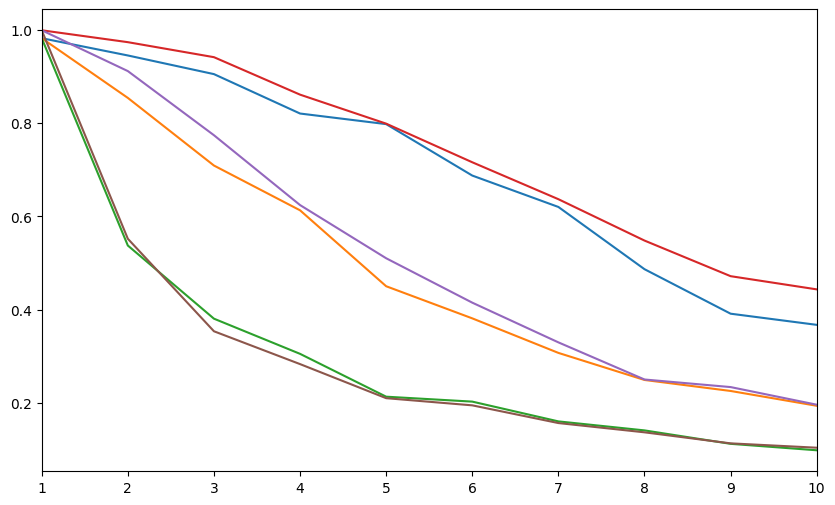

<Figure size 640x480 with 0 Axes>

In [53]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)

plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['goal_success_rate'],
    std=std['goal_success_rate'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Goal Success Rate",
)
fig.savefig('willow_garage_goal_success_rates.png', bbox_inches='tight')

Line2D(NAMO)
Line2D(NAMO w/o Deadlock Resolution)
Line2D(NAMO w/o Conflict Resolution)
Line2D(SNAMO)
Line2D(SNAMO w/o Deadlock Resolution)
Line2D(SNAMO w/o Conflict Resolution)


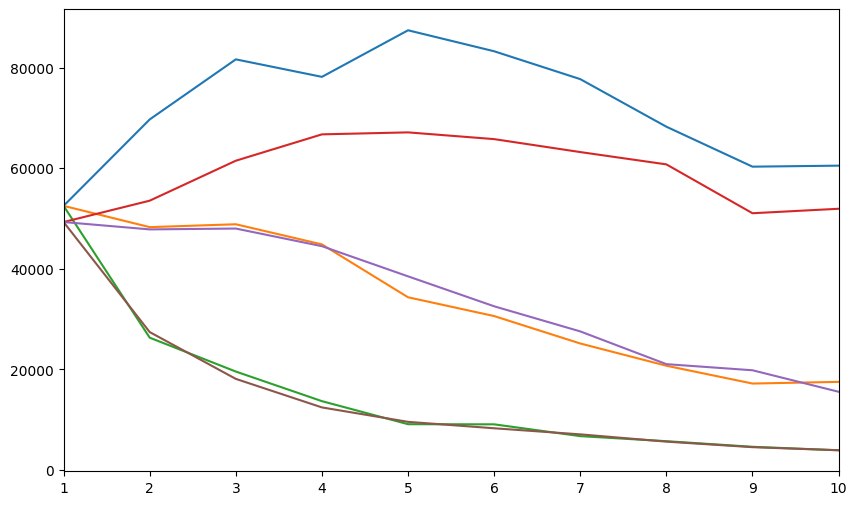

<Figure size 640x480 with 0 Axes>

In [54]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)

plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['distance_traveled'],
    std=std['distance_traveled'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Distance",
)
fig.savefig('willow_garage_avg_distance_traveled.png', bbox_inches='tight')

Line2D(NAMO)
Line2D(NAMO w/o Deadlock Resolution)
Line2D(NAMO w/o Conflict Resolution)
Line2D(SNAMO)
Line2D(SNAMO w/o Deadlock Resolution)
Line2D(SNAMO w/o Conflict Resolution)


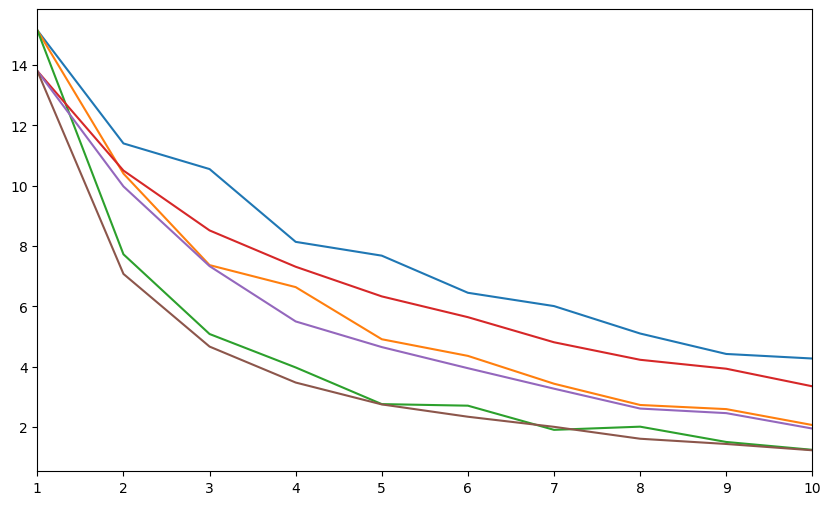

<Figure size 640x480 with 0 Axes>

In [55]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['n_transfers'],
    std=std['n_transfers'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Num Transfers",
)
fig.savefig('willow_garage_num_transfers.png', bbox_inches='tight')

Line2D(NAMO)
Line2D(NAMO w/o Deadlock Resolution)
Line2D(NAMO w/o Conflict Resolution)
Line2D(SNAMO)
Line2D(SNAMO w/o Deadlock Resolution)
Line2D(SNAMO w/o Conflict Resolution)


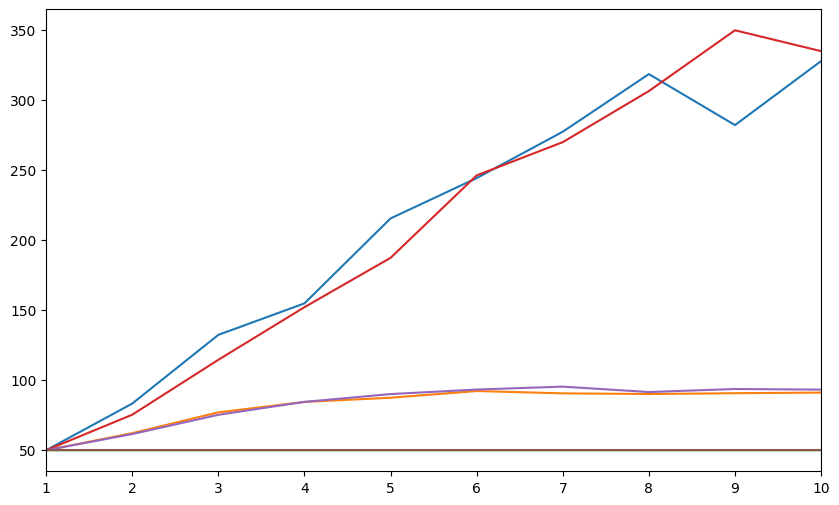

<Figure size 640x480 with 0 Axes>

In [56]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['replans'],
    std=std['replans'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Num Replans",
)
fig.savefig('willow_garage_num_replans.png', bbox_inches='tight')

Line2D(NAMO)
Line2D(NAMO w/o Deadlock Resolution)
Line2D(NAMO w/o Conflict Resolution)
Line2D(SNAMO)
Line2D(SNAMO w/o Deadlock Resolution)
Line2D(SNAMO w/o Conflict Resolution)


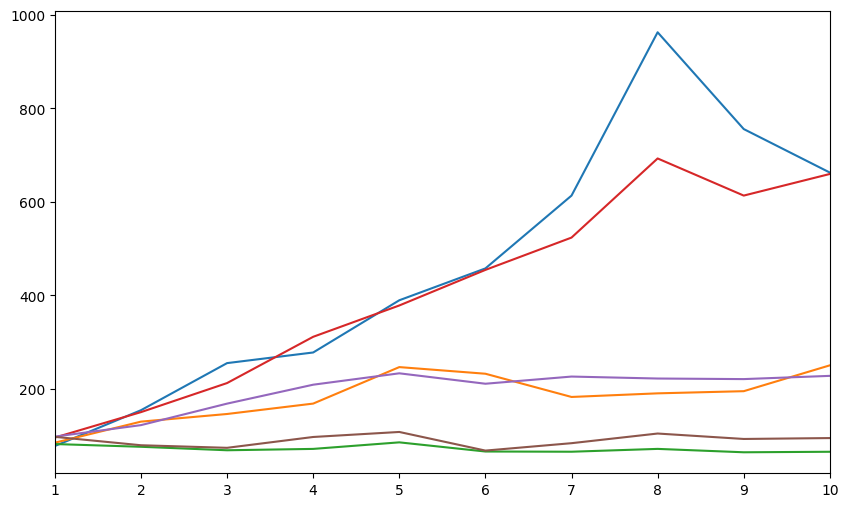

<Figure size 640x480 with 0 Axes>

In [57]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['planning_time'],
    std=std['planning_time'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Planning Time",
)
fig.savefig('willow_garage_planning_time.png', bbox_inches='tight')

Line2D(NAMO)
Line2D(NAMO w/o Deadlock Resolution)
Line2D(NAMO w/o Conflict Resolution)
Line2D(SNAMO)
Line2D(SNAMO w/o Deadlock Resolution)
Line2D(SNAMO w/o Conflict Resolution)


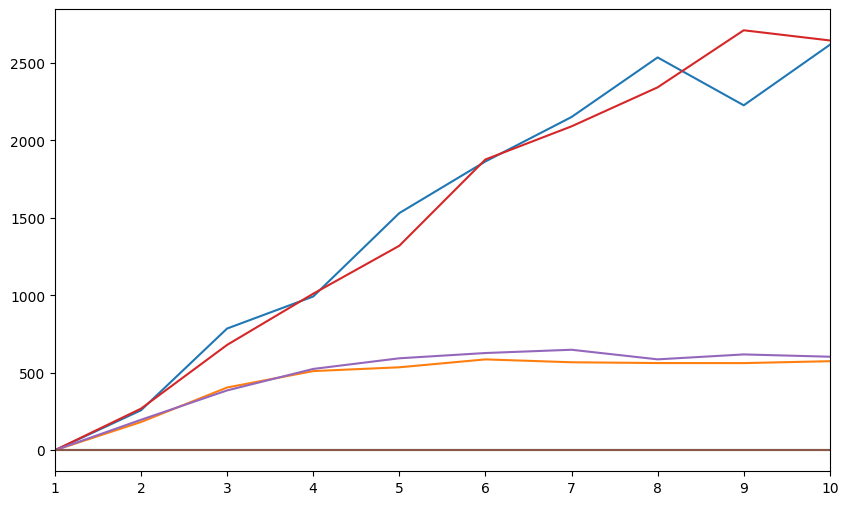

<Figure size 640x480 with 0 Axes>

In [58]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['postponements'],
    std=std['postponements'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Postponements",
)
fig.savefig('willow_garage_n_postponements.png', bbox_inches='tight')

Line2D(NAMO)
Line2D(NAMO w/o Deadlock Resolution)
Line2D(NAMO w/o Conflict Resolution)
Line2D(SNAMO)
Line2D(SNAMO w/o Deadlock Resolution)
Line2D(SNAMO w/o Conflict Resolution)


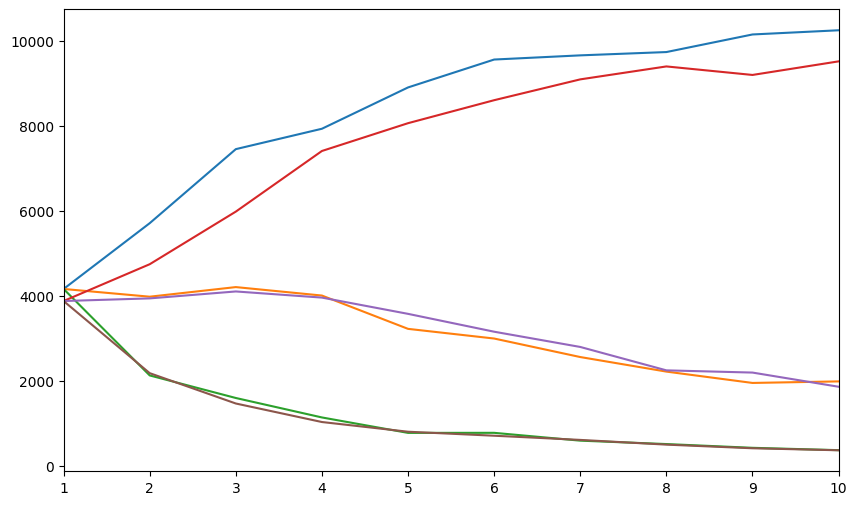

<Figure size 640x480 with 0 Axes>

In [59]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['n_steps'],
    std=std['n_steps'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Total Simulation Steps",
)
fig.savefig('willow_garage_n_steps.png', bbox_inches='tight')